### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
# -----------------------------
# Imports
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Global plot style
sns.set(context="notebook", style="whitegrid")
plt.rcParams["figure.figsize"] = (7.5, 4.5)
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 11

# Avoid long auto-printed outputs
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 25)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,...,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,...,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,...,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,...,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,...,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,...,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
missing_counts = data.isnull().sum()
missing_percentages = (data.isnull().sum() / len(data)) * 100
print("Missing Value Counts:\n", missing_counts)
print("\nMissing Value Percentages:\n", missing_percentages)

Missing Value Counts:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

Missing Value Percentages:
 destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time               

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# The column car seems to be missing values for most rows (99.15% of the rows). It would be safe to drop the column.
data = data.drop('car', axis=1)
data.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [6]:
# Examine if there are duplicate records
duplicate = data[data.duplicated(keep = 'last')]
duplicate.shape


(74, 25)

In [7]:
# Remove duplicates
data = data.drop_duplicates()
print(data.shape)

(12610, 25)


In [8]:
# Using mode imputation for missing values in Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50
data['Bar'] = data['Bar'].fillna(data['Bar'].value_counts().index[0])
data['CoffeeHouse'] = data['CoffeeHouse'].fillna(data['CoffeeHouse'].value_counts().index[0])
data['CarryAway'] = data['CarryAway'].fillna(data['CarryAway'].value_counts().index[0])
data['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna(data['RestaurantLessThan20'].value_counts().index[0])
data['Restaurant20To50'] = data['Restaurant20To50'].fillna(data['Restaurant20To50'].value_counts().index[0])

In [9]:
# Verify that the missing values were handled correctly
print('Are there any missing values still in data?',data.isnull().values.any())

Are there any missing values still in data? False


In [10]:
# Convert categorical columns in the dataframe to numeric.

# To achieve this, first step is to determine which columns in the DataFrame are of Dtype "object"
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

In [11]:
# Examine the unique values in each categorical column to understand their nature and decide on next steps
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"Number of unique values: {data[col].nunique()}")
    print(f"Unique values: {data[col].unique()}")
    print("_" * 100)
    print()

Column: destination
Number of unique values: 3
Unique values: ['No Urgent Place' 'Home' 'Work']
____________________________________________________________________________________________________

Column: passanger
Number of unique values: 4
Unique values: ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
____________________________________________________________________________________________________

Column: weather
Number of unique values: 3
Unique values: ['Sunny' 'Rainy' 'Snowy']
____________________________________________________________________________________________________

Column: time
Number of unique values: 5
Unique values: ['2PM' '10AM' '6PM' '7AM' '10PM']
____________________________________________________________________________________________________

Column: coupon
Number of unique values: 5
Unique values: ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
_______________________________________________________________________________

In [12]:
# Decisions on encoding strategies made examining unique values and manual inspection of the dataset using Excel:

# Columns with no clear order and unique values - One-Hot Encoding - destination, passanger, weather, coupon, gender, maritalStatus, occupation

# Columns with a clear order/ranking - Ordinal Encoding:

# time (10AM < 2PM < 6PM < 7AM < 10PM - assuming 7AM is the start of the day cycle)
# expiration (2h < 1d)
# age (below 21 < 21 < 26 < ... < 50+)
# education (Some High School < High School < Some college < Associates < Bachelors < Graduate)
# income (Less than $12500 < $12500-$24999 < ...)
# Bar (never < less1 < 1~3 < 4~8 < gt8) --> NaN handling needed
# CoffeeHouse (never < less1 < 1~3 < 4~8 < gt8) --> NaN handling needed
# CarryAway (never < less1 < 1~3 < 4~8 < gt8) --> NaN handling needed
# RestaurantLessThan20 (never < less1 < 1~3 < 4~8 < gt8) --> NaN handling needed
# Restaurant20To50 (never < less1 < 1~3 < 4~8 < gt8) --> NaN handling needed

# Legend: less1 - less than 1, gt8 - greater than 8

# Apply encoding to the dataframe and create a new dataframe

# Handle missing values in ordinal columns - we can safely assume the value to be "never" if it's missing
ordinal_cols_with_nan = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
for col in ordinal_cols_with_nan:
    data[col] = data[col].fillna('never')

# Define ordinal mapping based on unique values observed above
ordinal_mapping = {
    'time': {'7AM': 0, '10AM': 1, '2PM': 2, '6PM': 3, '10PM': 4},
    'expiration': {'2h': 0, '1d': 1},
    'age': {'below21': 0, '21': 1, '26': 2, '31': 3, '36': 4, '41': 5, '46': 6, '50plus': 7},
    'education': {'Some High School': 0, 'High School Graduate': 1, 'Some college - no degree': 2, 'Associates degree': 3, 'Bachelors degree': 4, 'Graduate degree (Masters or Doctorate)': 5, 'Some High School':0},
    'income': {'Less than $12500': 0, '$12500 - $24999': 1, '$25000 - $37499': 2, '$37500 - $49999': 3, '$50000 - $62499': 4, '$62500 - $74999': 5, '$75000 - $87499': 6, '$87500 - $99999': 7, '$100000 or More': 8},
    'Bar': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'CoffeeHouse': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'CarryAway': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'RestaurantLessThan20': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4},
    'Restaurant20To50': {'never': 0, 'less1': 1, '1~3': 2, '4~8': 3, 'gt8': 4}
}

# Apply Ordinal Encoding
for col, mapping in ordinal_mapping.items():
    data[col] = data[col].map(mapping)

# Apply One-Hot Encoding
one_hot_cols = ['destination', 'passanger', 'weather', 'coupon', 'gender', 'maritalStatus', 'occupation']
data_encoded = pd.get_dummies(data, columns=one_hot_cols, drop_first=True)

In [13]:
# Verify encoded data
data_encoded.head(5)

,temperature,time,expiration,age,has_children,education,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,...,occupation_Legal,occupation_Life Physical Social Science,occupation_Management,occupation_Office & Administrative Support,occupation_Personal Care & Service,occupation_Production Occupations,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed
0,55,2,1,1,1,2,3,0,0,2,3,2,...,False,False,False,False,False,False,False,False,False,False,False,True
1,80,1,0,1,1,2,3,0,0,2,3,2,...,False,False,False,False,False,False,False,False,False,False,False,True
2,80,1,0,1,1,2,3,0,0,2,3,2,...,False,False,False,False,False,False,False,False,False,False,False,True
3,80,2,0,1,1,2,3,0,0,2,3,2,...,False,False,False,False,False,False,False,False,False,False,False,True
4,80,2,1,1,1,2,3,0,0,2,3,2,...,False,False,False,False,False,False,False,False,False,False,False,True


In [14]:
# Verify data types after conversion
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype
---  ------                                                --------------  -----
 0   temperature                                           12610 non-null  int64
 1   time                                                  12610 non-null  int64
 2   expiration                                            12610 non-null  int64
 3   age                                                   12610 non-null  int64
 4   has_children                                          12610 non-null  int64
 5   education                                             12610 non-null  int64
 6   income                                                12610 non-null  int64
 7   Bar                                                   12610 non-null  int64
 8   CoffeeHouse                                           12610 non-null  int64
 9   

4. What proportion of the total observations chose to accept the coupon?



In [15]:
# Total number of observations
num_records = data_encoded.shape[0]

# Number of observations where coupon was accepted
num_accepted = data_encoded['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon
coupon_acceptance_proportion = num_accepted / num_records

#Print the results
print(f"The proportion of the total observations in which users chose to accept the coupon is: {coupon_acceptance_proportion:.4f}")

The proportion of the total observations in which users chose to accept the coupon is: 0.5676


5. Use a bar plot to visualize the `coupon` column.

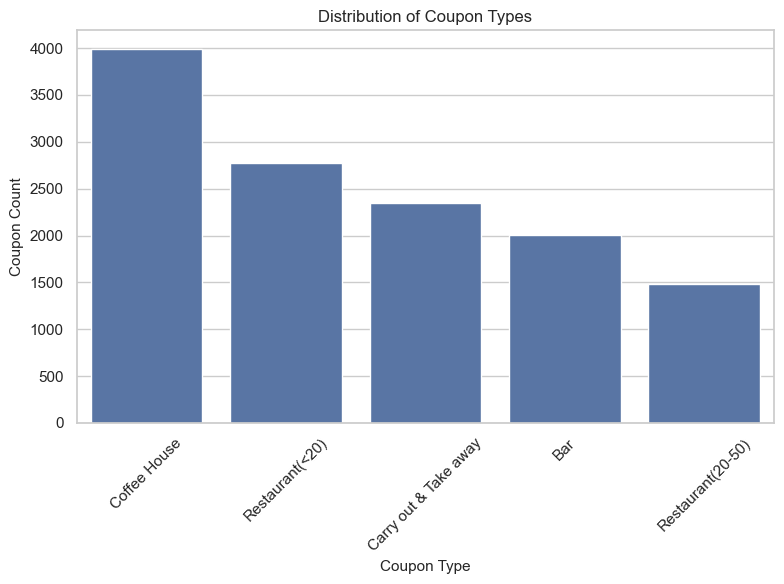

In [16]:
coupon_counts = data['coupon'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)
plt.xticks(rotation=45)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Coupon Count')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

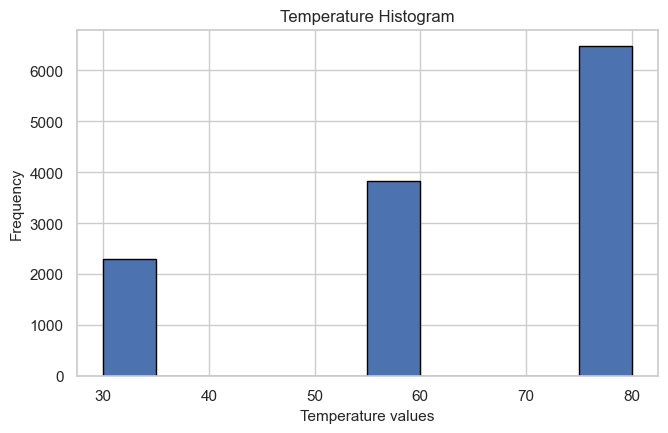

In [17]:
plt.hist(data['temperature'], bins=10, edgecolor='black')
plt.title('Temperature Histogram')
plt.xlabel('Temperature values')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
df_bar = data_encoded[data_encoded['Bar'] > 0.0]

2. What proportion of bar coupons were accepted?


In [19]:
# Total number of observations related to bar coupons
num_records = df_bar.shape[0]

# Number of observations where bar coupon was accepted
num_accepted = df_bar['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon
bar_cpn_acceptance_proportion = num_accepted / num_records

print(f"The proportion of bar coupons that were accepted is: {bar_cpn_acceptance_proportion:.4f}")


The proportion of bar coupons that were accepted is: 0.5940


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
df_bar_3_or_fewer = data_encoded[data_encoded['Bar'] <= 3.0]

# Total number of observations related to bar coupons when they went to bar 3 or fewer times a month
num_records_3_or_fewer = df_bar_3_or_fewer.shape[0]

# Number of observations where bar coupon was accepted when they went to bar 3 or fewer times a month
num_accepted_3_or_fewer = df_bar_3_or_fewer['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they went to bar 3 or fewer times a month
bar_cpn_acc_proportion_3_or_fewer = num_accepted_3_or_fewer / num_records_3_or_fewer

print(f"The proportion of bar coupons that were accepted when users went to bar 3 or fewer times a month is: {bar_cpn_acc_proportion_3_or_fewer:.4f}")


The proportion of bar coupons that were accepted when users went to bar 3 or fewer times a month is: 0.5673


In [21]:
df_bar_4_or_more = data_encoded[data_encoded['Bar'] > 3.0]

# Total number of observations related to bar coupons when they went to bar more than 3 times a month
num_records_4_or_more = df_bar_4_or_more.shape[0]

# Number of observations where bar coupon was accepted when they went to bar 3 or fewer times a month
num_accepted_4_or_more = df_bar_4_or_more['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they went to bar 3 or fewer times a month
bar_cpn_acc_proportion_4_or_more = num_accepted_4_or_more / num_records_4_or_more

print(f"The proportion of bar coupons that were accepted when users went to bar 4 or more times a month is: {bar_cpn_acc_proportion_4_or_more:.4f}")

The proportion of bar coupons that were accepted when users went to bar 4 or more times a month is: 0.5776


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [22]:
df_bar_2_or_more_over_25 = data_encoded[(data_encoded['Bar'] >= 2.0) & (data_encoded['age'] >= 2.0)]

# Total number of observations related to bar coupons when they went to bar more than once a month and over the age of 25
num_records_2_or_more_over_25 = df_bar_2_or_more_over_25.shape[0]

# Number of observations where bar coupon was accepted when they went to bar more than once a month and over the age of 25
num_accepted_2_or_more_over_25 = df_bar_2_or_more_over_25['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they went to bar more than once a month and over the age of 25
bar_cpn_acc_proportion_2_or_more_over_25 = num_accepted_2_or_more_over_25 / num_records_2_or_more_over_25

print(f"The proportion of bar coupons that were accepted when users went to bar more than once a month and over the age of 25 is: {bar_cpn_acc_proportion_2_or_more_over_25:.4f}")

The proportion of bar coupons that were accepted when users went to bar more than once a month and over the age of 25 is: 0.6202


In [23]:
df_bar_less_than_2_or_under_25 = data_encoded[(data_encoded['Bar'] < 2.0) | (data_encoded['age'] < 2.0)]

# Total number of observations related to bar coupons when they went to bar less than once a month and under the age of 25
num_records_less_than_2_or_under_25 = df_bar_less_than_2_or_under_25.shape[0]

# Number of observations where bar coupon was accepted when they went to bar less than once a month and under the age of 25
num_accepted_less_than_2_or_under_25 = df_bar_less_than_2_or_under_25['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they went to bar less than once a month and under the age of 25
bar_cpn_acc_proportion_less_than_2_or_under_25 = num_accepted_less_than_2_or_under_25 / num_records_less_than_2_or_under_25

print(f"The proportion of bar coupons that were accepted when users went to bar less than once a month or under the age of 25 is: {bar_cpn_acc_proportion_less_than_2_or_under_25:.4f}")


The proportion of bar coupons that were accepted when users went to bar less than once a month or under the age of 25 is: 0.5528


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [24]:
df_bar_2_or_more = data_encoded[data_encoded['Bar'] >= 2.0]

# Total number of observations related to bar coupons when they went to bar more than once a month
num_records_2_or_more = df_bar_2_or_more.shape[0]

# Number of observations where bar coupon was accepted when they went to bar more than once a month
num_accepted_2_or_more = df_bar_2_or_more['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they went to bar more than once a month and over the age of 25
bar_cpn_acc_proportion_2_or_more = num_accepted_2_or_more / num_records_2_or_more

print(f"The proportion of bar coupons that were accepted when users went to bar more than once a month is: {bar_cpn_acc_proportion_2_or_more:.4f}")


The proportion of bar coupons that were accepted when users went to bar more than once a month is: 0.6213


In [25]:
df_bar_passenger_not_kid = data_encoded[data_encoded['passanger_Kid(s)'] == False]

# Total number of observations related to bar coupons when they had passengers that were not kid(s)
num_records_passenger_not_kid = df_bar_passenger_not_kid.shape[0]

# Number of observations where bar coupon was accepted when they had passengers that were not kid(s)
num_accepted_passenger_not_kid = df_bar_passenger_not_kid['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they had passengers that were not kid(s)
bar_cpn_acc_proportion_passenger_not_kid = num_accepted_passenger_not_kid / num_records_passenger_not_kid

print(f"The proportion of bar coupons that were accepted when users had passengers that were not kid(s) is: {bar_cpn_acc_proportion_passenger_not_kid:.4f}")

The proportion of bar coupons that were accepted when users had passengers that were not kid(s) is: 0.5730


In [26]:
df_bar_occ_not_farmfishforestry = data_encoded[data_encoded['occupation_Farming Fishing & Forestry'] == False]

# Total number of observations related to bar coupons when the drivers had occupations other than farming, fishing, or forestry.
num_records_occ_not_farmfishforestry = df_bar_occ_not_farmfishforestry.shape[0]

# Number of observations where bar coupon was accepted when occ_not_farmfishforestry.
num_accepted_occ_not_farmfishforestry = df_bar_occ_not_farmfishforestry['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they had occupations other than farming, fishing, or forestry.
bar_cpn_acc_proportion_occ_not_farmfishforestry = num_accepted_occ_not_farmfishforestry / num_records_occ_not_farmfishforestry

print(f"The proportion of bar coupons that were accepted when the drivers had occupations other than farming, fishing, or forestry is: {bar_cpn_acc_proportion_occ_not_farmfishforestry:.4f}")

The proportion of bar coupons that were accepted when the drivers had occupations other than farming, fishing, or forestry is: 0.5677


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [27]:
#Comparing the acceptance rates between those drivers who:
#go to bars more than once a month and are under the age of 30

df_bar_2_or_more_under_30 = data_encoded[(data_encoded['Bar'] >= 2.0) & (data_encoded['age'] <= 2.0)]

# Total number of observations related to bar coupons when they went to bar more than once a month and over the age of 25
num_records_2_or_more_under_30 = df_bar_2_or_more_under_30.shape[0]

# Number of observations where bar coupon was accepted when they went to bar more than once a month and over the age of 25
num_accepted_2_or_more_under_30 = df_bar_2_or_more_under_30['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they went to bar more than once a month and over the age of 25
bar_cpn_acc_proportion_2_or_more_under_30 = num_accepted_2_or_more_under_30 / num_records_2_or_more_under_30

print(f"The proportion of bar coupons that were accepted when users went to bar more than once a month and under the age of 30 is: {bar_cpn_acc_proportion_2_or_more_under_30:.4f}")

The proportion of bar coupons that were accepted when users went to bar more than once a month and under the age of 30 is: 0.6275


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [28]:
# Based on the acceptance rates we calculated for the bar coupons, here are some observations and a possible hypothesis:
# Drivers who went to a bar more than once a month and were over the age of 25 had a higher acceptance rate (0.6202) compared to those who went 3 or fewer times (0.5673) or 4 or more times a month (0.5776).
# Drivers who went to bars more than once a month and were under the age of 30 had a slightly higher acceptance rate (0.6275) compared to those over 25 (0.6202).
# Drivers who went to bars more than once a month had an acceptance rate of 0.6213, drivers with passengers who were not kids had an acceptance rate of 0.5730, and
# drivers with occupations other than farming, fishing, or forestry had an acceptance rate of 0.5677.

# Hypothesis:

# Drivers who frequent bars more often and are within a certain age range (specifically under 30 based on our analysis so far) are more likely to accept bar coupons.
# The presence of certain passengers (not kids) and specific occupations might also influence acceptance, but the frequency of bar visits and age seem to be more strongly correlated based on our analysis.


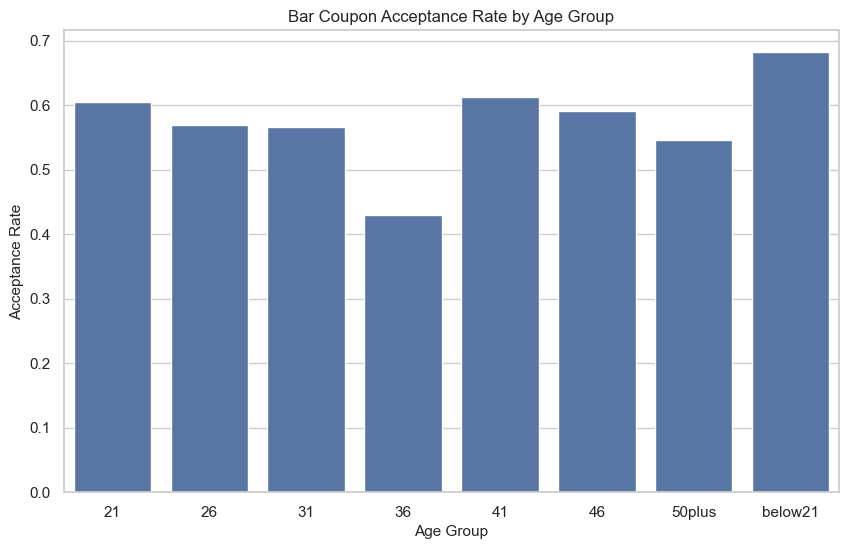

In [29]:
# Create a DataFrame with only bar coupons
df_bar_coupons = data_encoded[data_encoded['Bar'] == True].copy()

# Convert age back to string categories for better plotting labels
age_mapping_inverse = {v: k for k, v in ordinal_mapping['age'].items()}
df_bar_coupons['age_group'] = df_bar_coupons['age'].map(age_mapping_inverse)

# Group by age group and calculate the mean acceptance rate
age_acceptance = df_bar_coupons.groupby('age_group')['Y'].mean().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_acceptance.index, y=age_acceptance.values)
plt.title('Bar Coupon Acceptance Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.show()

In [30]:
# Based on the above visualization, it looks like the users aged below 21 were most likely to accept the coupon and we can target this specific age group with a higher chance of acceptance
# for Bar related coupons

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

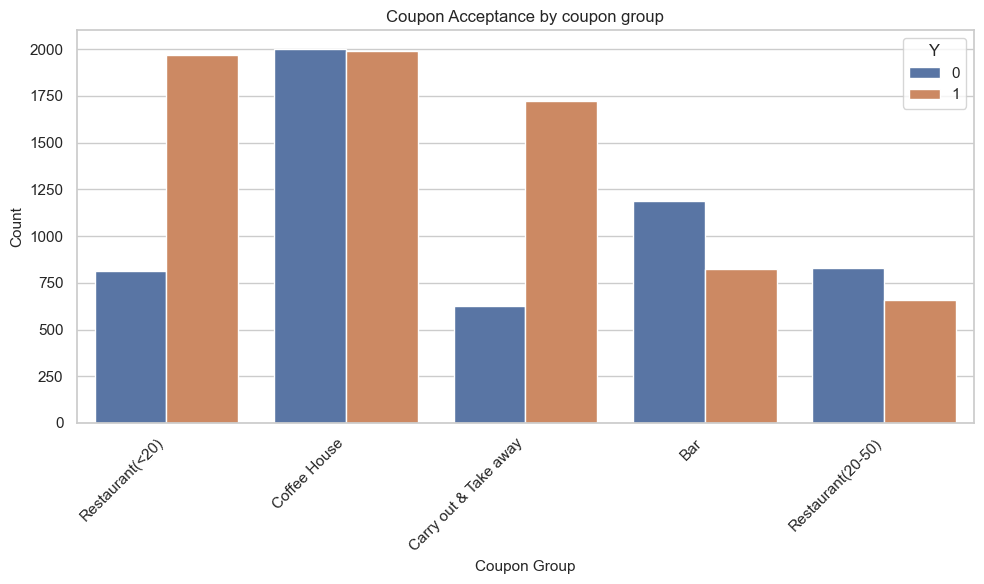

In [31]:
# For further analysis, let's look at all the coupon groups and acceptance within each group

# Create count plots for coupon acceptance by coupon group
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='coupon', hue='Y')
plt.title(f'Coupon Acceptance by coupon group')
plt.xlabel('Coupon Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# Based on the count plots above and bar plot we looked at earlier on coupon types, it looks like the maximum coupons were available for CoffeeHouse and it had about the same acceptance and rejection rates.
# Let's look into this further.

# Investigating the CoffeeHouse Coupons

# Create a new DataFrame that contains just the CoffeeHouse coupons.
df_coffee_house = data_encoded[data_encoded['CoffeeHouse'] > 0.0]

In [33]:
# What proportion of CoffeeHouse coupons were accepted?
# Total number of observations related to CoffeeHouse coupons
num_records = df_coffee_house.shape[0]

# Number of observations where CoffeeHouse coupon was accepted
num_accepted = df_coffee_house['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon
coffee_house_cpn_acceptance_proportion = num_accepted / num_records

print(f"The proportion of CoffeeHouse coupons that were accepted is: {coffee_house_cpn_acceptance_proportion:.4f}")

The proportion of CoffeeHouse coupons that were accepted is: 0.6011


In [34]:
# Compare the acceptance rate between those who went to a CoffeeHouse 3 or fewer times a month to those who went more.

df_ch_3_or_fewer = data_encoded[data_encoded['CoffeeHouse'] <= 3.0]

# Total number of observations related to CoffeeHouse coupons when they went to CoffeeHouse 3 or fewer times a month
num_records_3_or_fewer = df_ch_3_or_fewer.shape[0]

# Number of observations where CoffeeHouse coupon was accepted when they went to CoffeeHouse 3 or fewer times a month
num_accepted_3_or_fewer = df_ch_3_or_fewer['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they went to CoffeeHouse 3 or fewer times a month
ch_cpn_acc_proportion_3_or_fewer = num_accepted_3_or_fewer / num_records_3_or_fewer

print(f"The proportion of CoffeeHouse coupons that were accepted when users went to CoffeeHouse 3 or fewer times a month is: {ch_cpn_acc_proportion_3_or_fewer:.4f}")


The proportion of CoffeeHouse coupons that were accepted when users went to CoffeeHouse 3 or fewer times a month is: 0.5660


In [35]:
df_ch_4_or_more = data_encoded[data_encoded['CoffeeHouse'] > 3.0]

# Total number of observations related to CoffeeHouse coupons when they went to CoffeeHouse more than 3 times a month
num_records_4_or_more = df_ch_4_or_more.shape[0]

# Number of observations where CoffeeHouse coupon was accepted when they went to CoffeeHouse 3 or fewer times a month
num_accepted_4_or_more = df_ch_4_or_more['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they went to CoffeeHouse 3 or fewer times a month
ch_cpn_acc_proportion_4_or_more = num_accepted_4_or_more / num_records_4_or_more

print(f"The proportion of CoffeeHouse coupons that were accepted when users went to CoffeeHouse 4 or more times a month is: {ch_cpn_acc_proportion_4_or_more:.4f}")

The proportion of CoffeeHouse coupons that were accepted when users went to CoffeeHouse 4 or more times a month is: 0.5836


In [36]:
# Now, compare the acceptance rate between drivers who go to coffeehouses more than once a month and were driving with kid(s).

df_ch_2_or_more = data_encoded[data_encoded['CoffeeHouse'] >= 2.0]

# Total number of observations related to CoffeeHouse coupons when they went to CoffeeHouse more than once a month
num_records_2_or_more = df_ch_2_or_more.shape[0]

# Number of observations where CoffeeHouse coupon was accepted when they went to CoffeeHouse more than once a month
num_accepted_2_or_more = df_ch_2_or_more['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they went to CoffeeHouse more than once a month
ch_cpn_acc_proportion_2_or_more = num_accepted_2_or_more / num_records_2_or_more

print(f"The proportion of CoffeeHouse coupons that were accepted when users went to CoffeeHouse more than once a month is: {ch_cpn_acc_proportion_2_or_more:.4f}")

The proportion of CoffeeHouse coupons that were accepted when users went to CoffeeHouse more than once a month is: 0.6343


In [37]:
df_ch_passenger_Kids = data_encoded[data_encoded['passanger_Kid(s)'] == False]

# Total number of observations related to CoffeeHouse coupons when they had passengers that were not kid(s)
num_records_passenger_Kids = df_ch_passenger_Kids.shape[0]

# Number of observations where CoffeeHouse coupon was accepted when they had passengers that were not kid(s)
num_accepted_passenger_Kids = df_ch_passenger_Kids['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they had passengers that were not kid(s)
ch_cpn_acc_proportion_passenger_Kids = num_accepted_passenger_Kids / num_records_passenger_Kids

print(f"The proportion of CoffeeHouse coupons that were accepted when users had passengers that were not kid(s) is: {ch_cpn_acc_proportion_passenger_Kids:.4f}")

The proportion of CoffeeHouse coupons that were accepted when users had passengers that were not kid(s) is: 0.5730


In [38]:
#Comparing the acceptance rates between those drivers who:
#go to Coffee houses more than once a month and are under the age of 30

df_ch_2_or_more_under_30 = data_encoded[(data_encoded['CoffeeHouse'] >= 2.0) & (data_encoded['age'] <= 2.0)]

# Total number of observations related to CoffeeHouse coupons when they went to CoffeeHouse more than once a month and over the age of 25
num_records_2_or_more_under_30 = df_ch_2_or_more_under_30.shape[0]

# Number of observations where CoffeeHouse coupon was accepted when they went to CoffeeHouse more than once a month and over the age of 25
num_accepted_2_or_more_under_30 = df_ch_2_or_more_under_30['Y'].sum()

# Proportion of the total observations in which users chose to accept the coupon when they went to CoffeeHouse more than once a month and over the age of 25
ch_cpn_acc_proportion_2_or_more_under_30 = num_accepted_2_or_more_under_30 / num_records_2_or_more_under_30

print(f"The proportion of CoffeeHouse coupons that were accepted when users went to CoffeeHouse more than once a month and under the age of 30 is: {ch_cpn_acc_proportion_2_or_more_under_30:.4f}")

The proportion of CoffeeHouse coupons that were accepted when users went to CoffeeHouse more than once a month and under the age of 30 is: 0.6700


In [39]:
# Based on the above analysis of CoffeeHouse coupons, the overall acceptance rate for CoffeeHouse coupons is around 60.11%.
# As expected, drivers who frequent CoffeeHouses more often (4 or more times a month with an acceptance rate of 58.36% and more than once a month with an acceptance rate of 63.43%) are more likely
# to accept CoffeeHouse coupons compared to those who go 3 or fewer times (56.60%).
# Drivers with passengers who are not kids have an acceptance rate of 57.30%, which is slightly lower than those who frequent coffeehouses more often.
# Therefore, a hypothesis is that drivers who visit coffeehouses more frequently are more likely to accept coffeehouse coupons, with those going more than once a month showing a particularly higher acceptance rate.
# The presence of passengers who are not kids also seems to have a positive influence on acceptance.
# Drivers who went to Coffee Houses more than once a month and were under the age of 30 had a pretty high acceptance rate (0.6700).

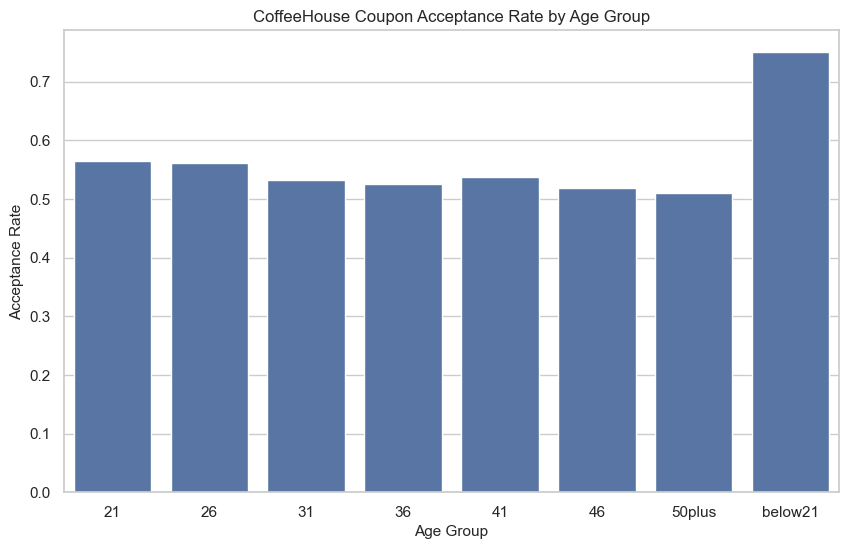

In [40]:
# Create a DataFrame with only CoffeeHouse coupons
df_ch_coupons = data_encoded[data_encoded['CoffeeHouse'] == True].copy()

# Convert age back to string categories for better plotting labels
age_mapping_inverse = {v: k for k, v in ordinal_mapping['age'].items()}
df_ch_coupons['age_group'] = df_ch_coupons['age'].map(age_mapping_inverse)

# Group by age group and calculate the mean acceptance rate
age_acceptance = df_ch_coupons.groupby('age_group')['Y'].mean().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_acceptance.index, y=age_acceptance.values)
plt.title('CoffeeHouse Coupon Acceptance Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.show()

In [41]:
# Based on the above visualization, it looks like the users aged below 21 were most likely to accept the coupon and we can target this specific age group with a higher chance of acceptance
# for CoffeeHouse related coupons as well